# **Project Name**    -



##### **Project Type**    - Unsupervised Machine Learning Project
##### **Contribution**    - Individual
##### **Apurba Koirala**

# **Project Summary -**

In today’s competitive business landscape, customer satisfaction is a key driver of success. Businesses rely on customer feedback to improve their products, services, and overall customer experience. Sentiment analysis, a technique used to assess customer emotions through reviews and ratings, provides valuable insights into consumer behavior. This project aims to analyze sentiment data using visualizations to understand the relationship between sentiment and key business factors such as ratings, costs, and commonly mentioned aspects in positive reviews. Through the use of boxplots and word clouds, this analysis helps businesses identify strengths and areas for improvement to drive growth.

One of the primary analyses in this project examines the relationship between customer sentiment and ratings. A boxplot visualization of sentiment categories—Positive, Negative, and Neutral—against ratings shows a clear trend: positive sentiment is associated with higher ratings, mostly between 4 and 5, while negative sentiment correlates with lower ratings, typically ranging from 1 to 2. Neutral sentiment, on the other hand, has a wide range of ratings, suggesting mixed opinions from customers. These findings highlight the importance of improving customer experiences to minimize negative sentiment, as low ratings can significantly impact business reputation and customer retention.

Understanding this trend allows businesses to develop targeted strategies for addressing negative feedback. If a company identifies that a large portion of its negative reviews results from poor service or product quality, it can take specific measures such as staff training, quality control improvements, and better customer support. By addressing these issues, businesses can increase positive sentiment, leading to higher ratings and better customer satisfaction.

Another key aspect analyzed in this project is the relationship between customer sentiment and cost. A boxplot comparing sentiment with cost shows that customers with positive sentiment tend to spend slightly more, whereas those with negative sentiment exhibit a wider range of spending behavior. This suggests that dissatisfaction is not limited to budget-conscious customers but also affects those who spend more.

For businesses, this insight is crucial in ensuring that premium-priced offerings deliver value for money. If customers perceive that they are paying a high price but receiving subpar quality or service, they are more likely to leave negative reviews. Addressing this issue by improving product quality, enhancing service, or offering better deals can help businesses reduce negative sentiment and maintain a loyal customer base.

To further understand what drives customer satisfaction, a word cloud of positive reviews was generated. The most frequently mentioned words include “place,” “service,” “good,” “taste,” and “food,” indicating that service quality and food taste are major factors contributing to positive sentiment. Additionally, terms such as “staff,” “ambience,” and “amazing” suggest that the overall dining experience plays a crucial role in customer satisfaction.

These insights can help businesses reinforce their strengths and use them in marketing strategies. Highlighting excellent service, friendly staff, and a great dining atmosphere in promotional materials can attract more customers and improve brand perception. Additionally, businesses can focus on maintaining these positive aspects to ensure consistent customer satisfaction.

This project demonstrates the power of sentiment analysis in improving business performance. By analyzing the relationship between sentiment, ratings, and cost, businesses can identify key areas that need improvement. Addressing negative sentiment and reinforcing positive aspects can lead to higher customer satisfaction, better ratings, and ultimately, increased revenue. Through data visualization techniques like boxplots and word clouds, businesses can make informed decisions to enhance their services and maintain a strong competitive edge in the market.

# **GitHub Link -**

https://github.com/apurbaaaa/Zomato

# **Problem Statement**


**Understanding customer feedback is crucial for restaurant success, but analyzing large volumes of reviews is challenging. This project aims to perform sentiment analysis on Zomato reviews and cluster restaurants based on key factors like pricing and customer experience. By visualizing insights, businesses can identify areas for improvement, optimize cost vs. benefit analysis, and enhance customer satisfaction. Additionally, reviewer metadata can help distinguish credible critics, providing valuable industry insights.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from nltk.corpus import stopwords
import warnings
from textblob import TextBlob
from wordcloud import WordCloud
import scipy.stats as stats
from scipy.stats import chi2_contingency, f_oneway, ttest_ind
from sklearn.preprocessing import StandardScaler, LabelEncoder
import contractions
import string
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm 
import nltk
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors
import pickle
from sklearn.model_selection import ParameterGrid

### Dataset Loading

In [2]:
# Load Dataset
names = pd.read_csv("Zomato Restaurant names and Metadata.csv")
reviews = pd.read_csv("Zomato Restaurant reviews.csv")

### Dataset First View

In [3]:
# Dataset First Look
names.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Names and Metadata count: ", names.shape)
print("Reviews count: ", reviews.shape)

Names and Metadata count:  (105, 6)
Reviews count:  (10000, 7)


### Dataset Information

In [6]:
# Dataset Info
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value 
print("Duplicated Value Count in Names and Metadata: ", names.duplicated().sum(), "\n")
print("Duplicated Value Count in Reviews: ", reviews.duplicated().sum(), "\n")

Duplicated Value Count in Names and Metadata:  0 

Duplicated Value Count in Reviews:  36 



#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print("Null Value Count in Names and Metadata: ", names.isnull().sum(), "\n")
print("Null Value Count in Reviews: ", reviews.isnull().sum(), "\n")

Null Value Count in Names and Metadata:  Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Null Value Count in Reviews:  Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64 



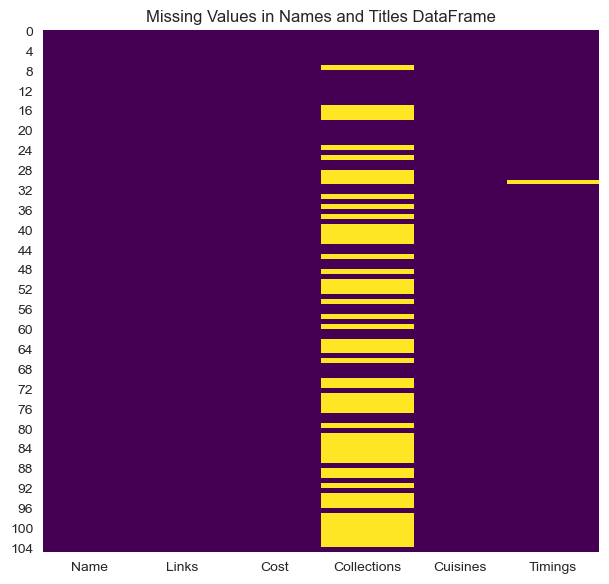

In [10]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(names.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Names and Titles DataFrame")

plt.tight_layout()
plt.show()

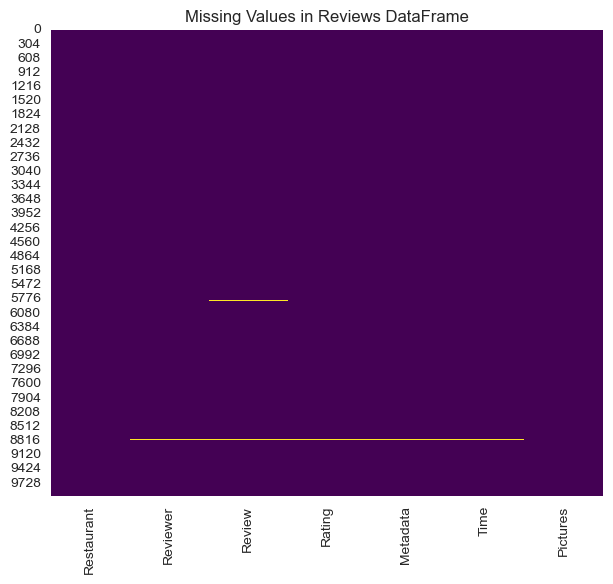

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(reviews.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Reviews DataFrame")

plt.tight_layout()
plt.show()

### What did you know about your dataset?

The Collections columns in the names df has many missing values, wise to be dropped, the same rows in the reviews df have missing values, so wise to be dropped

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
print(names.columns, "\n", reviews.columns)

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object') 
 Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [13]:
# Dataset Describe
names.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [14]:
reviews.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description

The columns in the metadata and names dataframe desribe the restaurant where as the columns in the reviews dataframe describe reviews given by individuals at different time intervals

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
names.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [16]:
reviews.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# Remove non-numeric rating values
# reviews = reviews[reviews['Rating'] != 'Like']
# Remove non-numeric rating values
reviews = reviews[reviews['Rating'] != 'Like']

# Fill missing values in 'Collections' column
names['Collections'].fillna('No Collections Available', inplace=True)

# Drop rows where the 'Review' column is null
reviews.dropna(subset=['Review'], inplace=True)

# Fill missing values in 'Timings' column
names['Timings'].fillna("Unknown", inplace=True)

# Remove duplicate reviews
reviews.drop_duplicates(keep='first', inplace=True)

reviews['Rating'] = pd.to_numeric(reviews['Rating'], errors='coerce')

# Calculate the average rating per restaurant
average_ratings = reviews.groupby('Restaurant')['Rating'].mean()

# Merge the average ratings back into the original DataFrame
reviews['average_rating'] = reviews['Restaurant'].map(average_ratings)


reviews.head()
reviews.drop("Rating", axis = 1)
warnings.filterwarnings("ignore")

/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_85834/3908878484.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  names['Collections'].fillna('No Collections Available', inplace=True)
/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_85834/3908878484.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [18]:
df = reviews.merge(names, left_on="Restaurant", right_on="Name", how="left")
df.drop(columns=["Name"], inplace=True)

text_columns = ["Restaurant", "Reviewer", "Review", "Metadata", "Time", "Collections", "Cuisines", "Timings"]
for col in text_columns:
    df[col] = df[col].str.strip()

In [19]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    return "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"

# Apply sentiment analysis
df["Sentiment"] = df["Review"].map(get_sentiment)

In [20]:
df["Sentiment"].head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: Sentiment, dtype: object

In [21]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,average_rating,Links,Cost,Collections,Cuisines,Timings,Sentiment
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,4.28,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Positive
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,4.28,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Positive
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,4.28,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Positive
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,4.28,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Positive
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,4.28,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Positive


In [22]:
df.to_csv("merged.csv", index=False)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

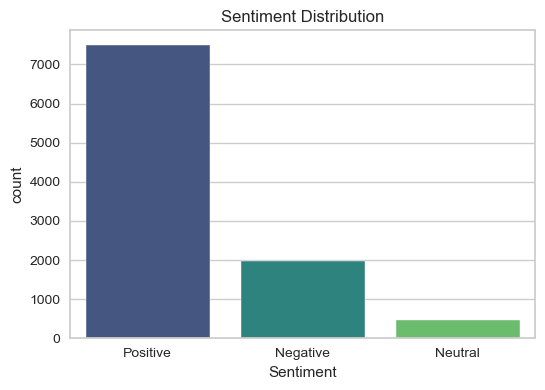

In [23]:
# Chart - 1 visualization code
sns.set_style("whitegrid")
# 1. Sentiment Distribution (Univariate)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment"], palette="viridis")
plt.title("Sentiment Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

The count plot was chosen to visualize the distribution of sentiments (Positive, Negative, Neutral) in the dataset. This type of chart is effective for displaying the frequency of categorical data, making it easy to compare the prevalence of different sentiments.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the distribution of customer sentiments. It reveals the proportion of positive, negative, and neutral reviews. For example, if positive sentiments are significantly higher, it indicates overall customer satisfaction. Conversely, a high number of negative sentiments could highlight areas needing improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding sentiment distribution can help businesses identify areas of strength and weakness. Positive sentiments can be leveraged in marketing, while negative sentiments can guide improvements in products or services, potentially enhancing customer satisfaction and loyalty.

If the chart shows a high proportion of negative sentiments, it could indicate widespread customer dissatisfaction, which might lead to negative growth. For instance, if a significant number of customers are unhappy with a product or service, it could result in decreased sales, negative word-of-mouth, and a damaged reputation.

#### Chart - 2

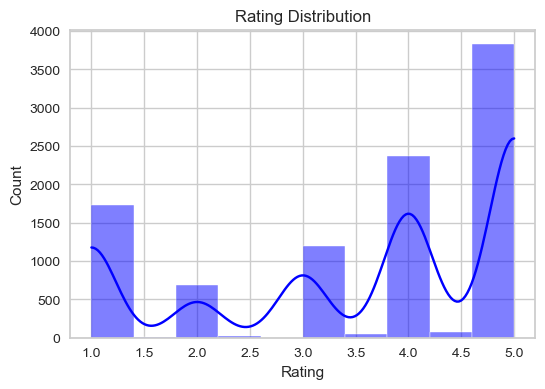

In [24]:
# Chart - 2 visualization code
# 2. Rating Distribution (Univariate)
plt.figure(figsize=(6, 4))
sns.histplot(df["Rating"], bins=10, kde=True, color="blue")
plt.title("Rating Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen to display the distribution of ratings. This type of chart is useful for understanding the frequency of different rating values and identifying patterns or trends in customer feedback.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into how customers rate the products or services. It shows the concentration of ratings, such as whether most ratings are high (e.g., 4.0-5.0) or if there is a significant number of low ratings (e.g., 1.0-2.0). This helps in assessing overall customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding rating distribution can help businesses identify areas for improvement and recognize strengths. High ratings can be used in promotional materials, while low ratings can highlight specific issues that need to be addressed to improve customer experience.

If the chart shows a substantial number of low ratings, it could indicate customer dissatisfaction, potentially leading to negative growth. For example, if a significant portion of customers rate the product or service poorly, it could result in decreased customer retention and negative reviews, impacting the business's reputation and sales.



#### Chart - 3

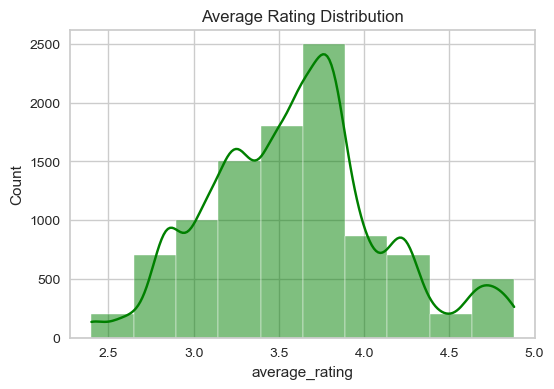

In [25]:
# Chart - 3 visualization code
# 3. Average Rating Distribution (Univariate)
plt.figure(figsize=(6, 4))
sns.histplot(df["average_rating"], bins=10, kde=True, color="green")
plt.title("Average Rating Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen to visualize the distribution of average ratings. This chart helps in understanding the central tendency and variability of ratings, providing a clear picture of overall customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the distribution of average ratings, showing whether most ratings are clustered around a high value (indicating good customer satisfaction) or if there is a wide spread (indicating mixed feedback). It helps in identifying the overall trend in customer ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights from the average rating distribution can guide strategic decisions. High average ratings can be used to build brand credibility, while understanding the spread can help in identifying specific areas that need improvement to enhance overall customer satisfaction.

If the chart shows a low average rating or a wide spread with many low ratings, it could indicate inconsistent quality or customer dissatisfaction, potentially leading to negative growth. For instance, if the average rating is low, it might deter new customers and lead to a decline in repeat business.

#### Chart - 4

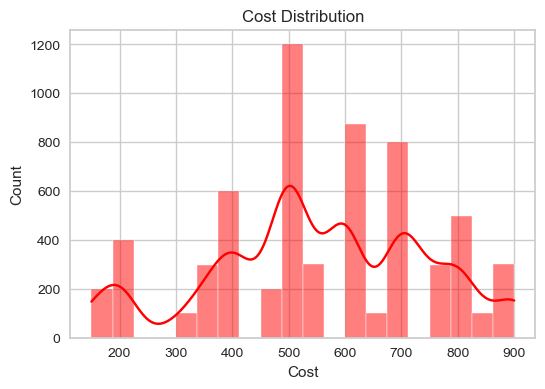

In [26]:
# Chart - 4 visualization code
# 4. Cost Distribution (Univariate)
df["Cost"] = pd.to_numeric(df["Cost"], errors="coerce")
plt.figure(figsize=(6, 4))
sns.histplot(df["Cost"].dropna(), bins=20, kde=True, color="red")
plt.title("Cost Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen to display the distribution of costs. This type of chart is effective for understanding the range and frequency of different cost values, helping to identify typical price points and outliers.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into the cost distribution of products or services. It shows the most common price ranges and whether there are any outliers. This helps in understanding the pricing strategy and its alignment with customer expectations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding cost distribution can help in optimizing pricing strategies. If the costs are well-aligned with customer expectations and market standards, it can lead to increased sales and customer satisfaction. Identifying outliers can also help in adjusting prices to better meet market demands.

If the chart shows a high concentration of costs at a price point that is not competitive or too high for the target market, it could lead to negative growth. For example, if most products are priced higher than what customers are willing to pay, it might result in decreased sales and customer retention.

#### Chart - 5

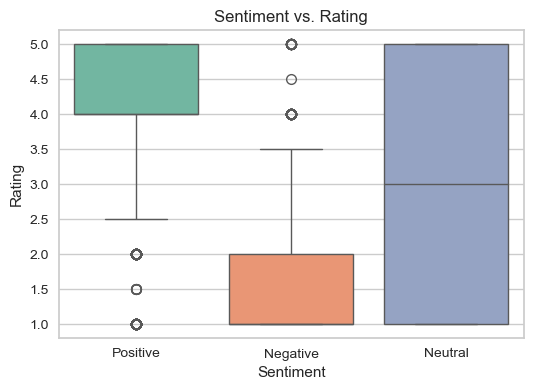

In [27]:
# Chart - 5 visualization code
# 5. Sentiment vs. Rating (Bivariate)
plt.figure(figsize=(6, 4))
sns.boxplot(x="Sentiment", y="Rating", data=df, palette="Set2")
plt.title("Sentiment vs. Rating")
plt.show()

##### 1. Why did you pick the specific chart?

This boxplot was chosen to analyze the relationship between customer sentiment (Positive, Negative, Neutral) and their given ratings. It helps visualize the spread, median, and outliers, giving an insightful representation of customer perception.

##### 2. What is/are the insight(s) found from the chart?

Positive sentiment is associated with higher ratings, typically around 4 to 5.
Negative sentiment has significantly lower ratings, mostly between 1 and 2.
Neutral sentiment has a wide range of ratings, indicating mixed opinions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights highlight the importance of improving customer experience to reduce negative sentiment, which directly correlates with low ratings.
High negative sentiment can lead to negative growth due to poor customer retention and reputation.
Addressing customer complaints effectively can help turn negative sentiments into positive ones, leading to better ratings and business growth.

#### Chart - 6

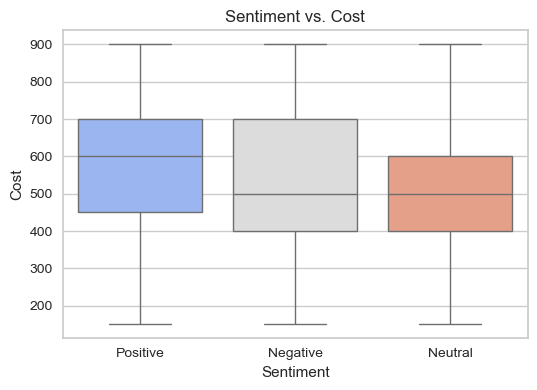

In [28]:
# Chart - 6 visualization code
# 6. Sentiment vs. Cost (Bivariate)
plt.figure(figsize=(6, 4))
sns.boxplot(x="Sentiment", y="Cost", data=df, palette="coolwarm")
plt.title("Sentiment vs. Cost")
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to understand the relationship between sentiment and cost. It helps analyze whether customers who spend more are more satisfied or dissatisfied with their experience.

##### 2. What is/are the insight(s) found from the chart?

Customers with positive sentiment tend to have a slightly higher median spending.
Negative sentiment is distributed across all cost ranges, suggesting dissatisfaction across different price points.
Neutral sentiment customers have a relatively balanced cost distribution, implying no strong correlation between cost and their satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If high-spending customers express negative sentiment, it could indicate issues with value-for-money perception, which may lead to customer churn.
Businesses should ensure that high-cost offerings align with customer expectations to maintain positive sentiment.
Addressing concerns of negatively rated expensive purchases could improve revenue retention.

#### Chart - 7

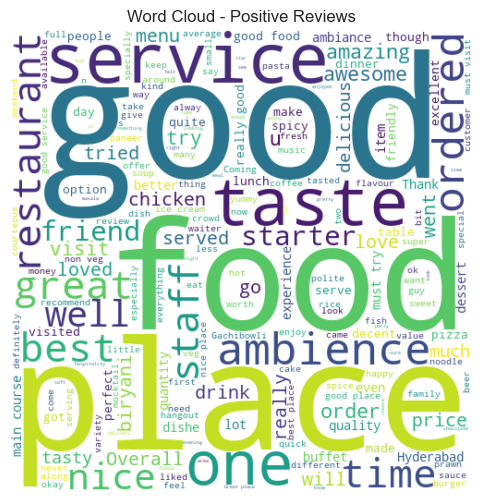

In [29]:
# Chart - 7 visualization code
# 7. Word Cloud - Positive Reviews (Univariate)
positive_reviews = " ".join(df[df["Sentiment"] == "Positive"]["Review"].dropna())
wordcloud_positive = WordCloud(width=500, height=500, background_color="white").generate(positive_reviews)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Word Cloud - Positive Reviews")
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

This word cloud was chosen to highlight key themes in positive reviews, helping identify factors contributing to customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Words like "place," "service," "good," "taste," and "food" appear frequently, indicating that service quality and food taste are major drivers of positive sentiment.
Additional keywords like "staff," "ambience," "friendly," and "amazing" suggest that the overall dining experience also plays a crucial role.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by reinforcing the elements that customers appreciate—such as excellent service, good taste, and ambiance—businesses can enhance customer satisfaction.
Any decline in these key factors might lead to negative reviews and reduced growth.
Using these insights, marketing and operational improvements can be targeted toward enhancing these appreciated aspects, driving long-term business success.

#### Chart - 8

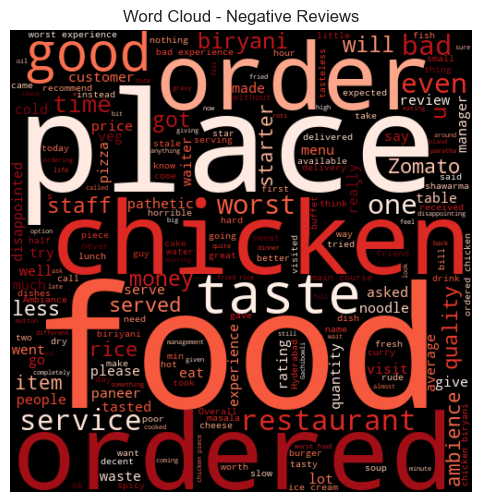

In [30]:
# Chart - 8 visualization code
# 8. Word Cloud - Negative Reviews (Univariate)
negative_reviews = " ".join(df[df["Sentiment"] == "Negative"]["Review"].dropna())
wordcloud_negative = WordCloud(width=500, height=500, background_color="black", colormap="Reds").generate(negative_reviews)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Word Cloud - Negative Reviews")
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud chart was chosen to visually represent the most frequently occurring words in negative reviews. This type of chart is effective for quickly identifying common themes or issues that customers are dissatisfied with, as the size of each word in the cloud corresponds to its frequency in the text.

##### 2. What is/are the insight(s) found from the chart?

The word cloud highlights the most common words or phrases in negative reviews. These insights can reveal recurring problems or complaints, such as specific product flaws, poor customer service, or other areas of dissatisfaction. By analyzing these words, businesses can pinpoint key issues that need to be addressed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact by identifying areas for improvement. Addressing the common issues highlighted in the negative reviews can lead to enhanced customer satisfaction, improved product quality, and better service, ultimately fostering customer loyalty and positive word-of-mouth.

If the insights reveal severe or widespread issues that are not addressed promptly, they could lead to negative growth. For example, if a significant number of negative reviews highlight a critical product defect, and the company fails to rectify it, this could result in lost sales, damaged reputation, and decreased customer trust. Immediate action is crucial to mitigate these risks.

#### Chart - 9

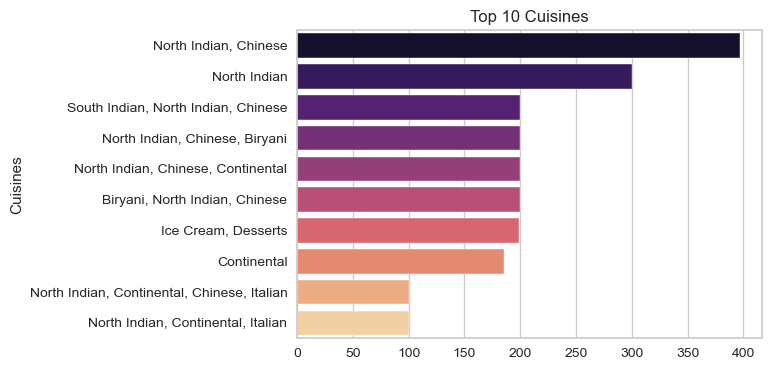

In [31]:
# Chart - 9 visualization code
# 9. Top Cuisines (Univariate)
top_cuisines = df["Cuisines"].value_counts().head(10)
plt.figure(figsize=(6, 4))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="magma")
plt.title("Top 10 Cuisines")
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart was chosen to clearly display the top cuisines based on their frequency or popularity. This type of chart is effective for comparing different categories (in this case, cuisines) and easily identifying which ones are the most preferred by customers. The visual representation helps in quickly understanding the distribution and popularity of various cuisines.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the most popular cuisines among customers, with North Indian and Chinese cuisines being the most frequently mentioned. Other notable cuisines include South Indian, Biryani, Continental, and Italian. The chart also shows the relative popularity of these cuisines, with North Indian cuisine being the most dominant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact by guiding menu optimization, marketing strategies, and inventory management. By focusing on the most popular cuisines, businesses can cater to customer preferences more effectively, potentially increasing customer satisfaction and sales. Additionally, understanding popular cuisines can help in planning promotions and special offers.

If the chart shows a lack of diversity in popular cuisines, it might indicate a potential risk of over-reliance on a few types of cuisine, which could limit customer base expansion. For example, if a restaurant only focuses on North Indian and Chinese cuisines, it might miss out on attracting customers who prefer other types of food. Diversifying the menu based on customer preferences and emerging trends can help mitigate this risk and support sustained growth.

#### Chart - 10

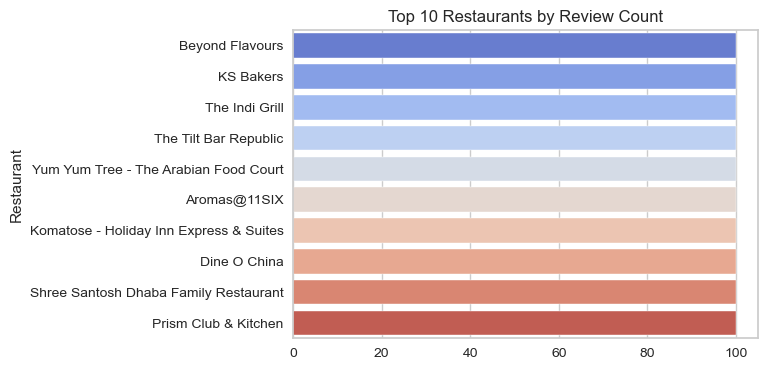

In [32]:
# Chart - 10 visualization code
# 10. Top Restaurants by Review Count (Univariate)
top_restaurants = df["Restaurant"].value_counts().head(10)
plt.figure(figsize=(6, 4))
sns.barplot(y=top_restaurants.index, x=top_restaurants.values, palette="coolwarm")
plt.title("Top 10 Restaurants by Review Count")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen because it effectively compares the number of reviews for the top 10 restaurants, providing a clear ranking based on customer engagement.

##### 2. What is/are the insight(s) found from the chart?

"Beyond Flavours" and "KS Bakers" have the highest number of reviews, indicating strong customer engagement and popularity.
The restaurants at the lower end may need to focus on increasing visibility and customer interactions to improve their online presence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, restaurants with lower review counts can work on marketing strategies, customer engagement, and promotional offers to attract more reviews.
A lower number of reviews may indicate a lack of customer interaction, which can negatively affect business growth in a competitive market.

#### Chart - 11

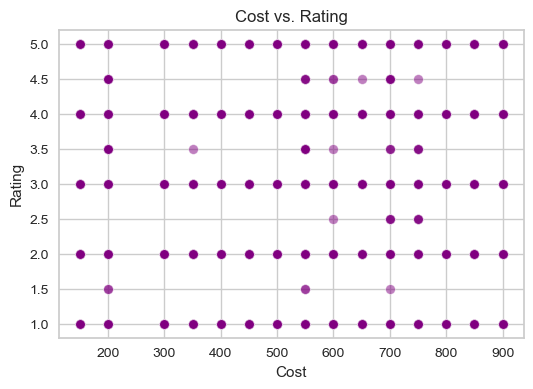

In [33]:
# Chart - 11 visualization code
# 11. Cost vs. Rating (Bivariate)
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Cost", y="Rating", data=df, alpha=0.5, color="purple")
plt.title("Cost vs. Rating")
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to explore whether there is a relationship between the cost of dining and customer ratings, helping to determine if price impacts customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

There is no clear trend indicating that higher-cost restaurants receive higher ratings.
Ratings are distributed across all price ranges, suggesting that customer satisfaction is influenced by factors beyond just cost, such as service, food quality, and ambiance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, businesses can use this insight to focus on improving service and quality rather than assuming higher pricing will lead to better ratings.
If high-cost restaurants receive poor ratings, they may need to justify their pricing with better quality or promotions.

#### Chart - 12

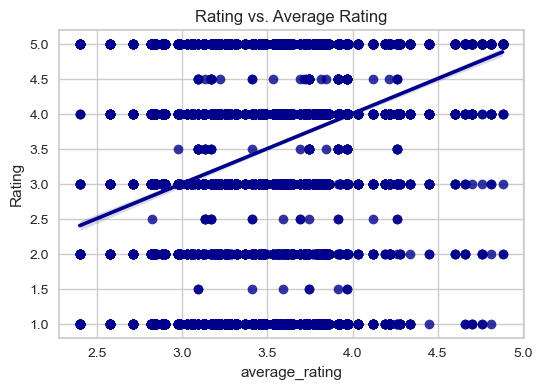

In [34]:
# Chart - 12 visualization code
# 12. Rating vs. Average Rating (Bivariate)
plt.figure(figsize=(6, 4))
sns.regplot(x="average_rating", y="Rating", data=df, color="darkblue")
plt.title("Rating vs. Average Rating")
plt.show()

##### 1. Why did you pick the specific chart?

A regression plot helps visualize the correlation between individual restaurant ratings and their average ratings, showing consistency or variability in customer opinions.

##### 2. What is/are the insight(s) found from the chart?

There is a strong positive correlation between individual ratings and average ratings, meaning that restaurants with higher average ratings tend to receive consistently high ratings.
However, there are some variations where individual ratings deviate from the expected trend, indicating mixed customer experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, restaurants can analyze deviations from the trend to understand inconsistencies in service quality.
If a restaurant has a wide range of ratings despite a high average, it may indicate fluctuating service quality, which needs to be addressed to maintain customer trust.

#### Chart - 13

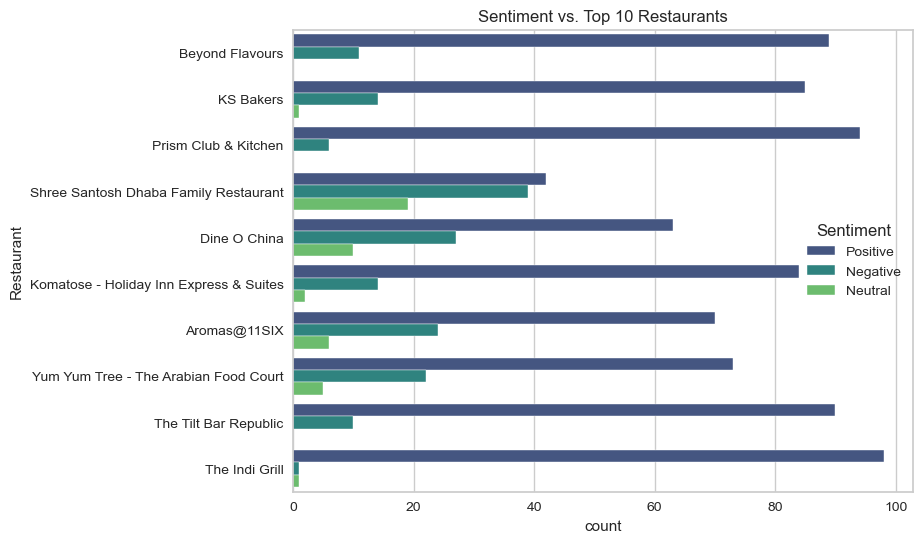

In [35]:
# Chart - 13 visualization code
# 13. Sentiment vs. Top 10 Restaurants (Multivariate)
top_restaurant_sentiments = df[df["Restaurant"].isin(top_restaurants.index)]
plt.figure(figsize=(8, 6))
sns.countplot(y="Restaurant", hue="Sentiment", data=top_restaurant_sentiments, palette="viridis")
plt.title("Sentiment vs. Top 10 Restaurants")
plt.show()

##### 1. Why did you pick the specific chart?

A count plot was chosen to effectively visualize the distribution of positive, negative, and neutral sentiments for the top 10 restaurants. This helps in understanding customer feedback trends.

##### 2. What is/are the insight(s) found from the chart?

Most restaurants have predominantly positive reviews, but some have a significant number of negative and neutral reviews.
"Shree Santosh Dhaba Family Restaurant" and "Dine O China" have relatively higher negative sentiments compared to others.
Restaurants such as "Beyond Flavours" and "KS Bakers" have overwhelmingly positive sentiment, indicating strong customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, businesses can use these insights to address customer concerns and improve their services. Restaurants with more negative sentiments should analyze common complaints and take corrective measures.
If negative reviews remain unaddressed, they may lead to a decline in customer retention and brand reputation.

#### Chart - 14

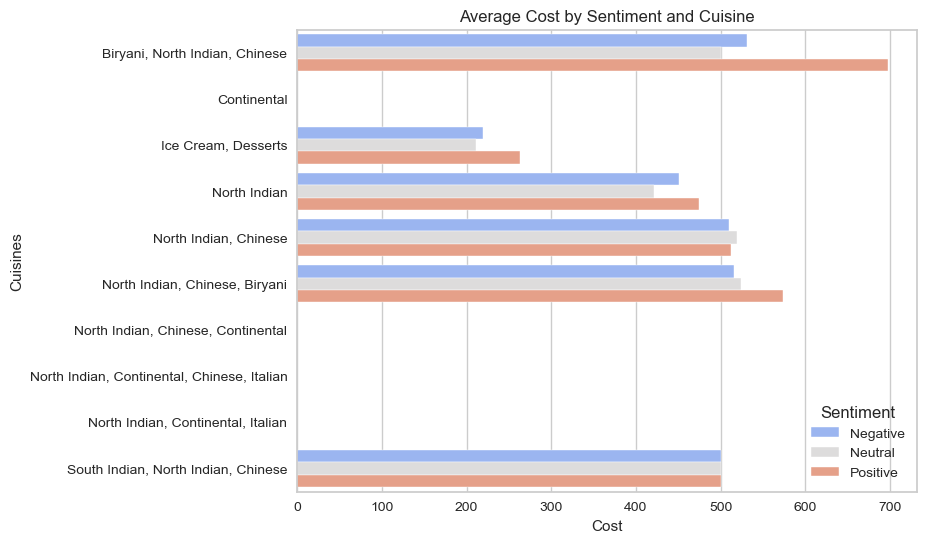

In [36]:
# Chart - 14 visualization code
# 14. Average Cost by Sentiment and Cuisine (Multivariate)
df_grouped = df.groupby(["Cuisines", "Sentiment"])["Cost"].mean().reset_index()
df_grouped = df_grouped[df_grouped["Cuisines"].isin(top_cuisines.index)]
plt.figure(figsize=(8, 6))
sns.barplot(y="Cuisines", x="Cost", hue="Sentiment", data=df_grouped, palette="coolwarm")
plt.title("Average Cost by Sentiment and Cuisine")
plt.show()

##### 1. Why did you pick the specific chart?

We chose a bar plot with sentiment-based cost analysis because it effectively visualizes the relationship between average cost, cuisine type, and customer sentiment. This multivariate analysis helps understand how pricing influences customer satisfaction across different cuisines.

##### 2. What is/are the insight(s) found from the chart?

Certain cuisines, such as Continental and North Indian, have higher costs but still receive positive sentiment, indicating that customers find them worth the price.
Some cuisines, like Ice Cream & Desserts, have lower costs but show mixed sentiments, possibly due to quality or portion size concerns.
Combination cuisines (e.g., North Indian + Chinese) exhibit varied sentiment, suggesting that customer experience depends on specific menu offerings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can guide pricing strategies and menu optimizations.

Positive Impact: Restaurants can confidently price premium cuisines higher without negatively affecting sentiment.
Negative Growth Risks: If lower-cost cuisines receive negative sentiment, it may indicate issues with quality or service, leading to customer dissatisfaction. Addressing these gaps can help prevent revenue loss.

#### Chart - 15 - Correlation Heatmap

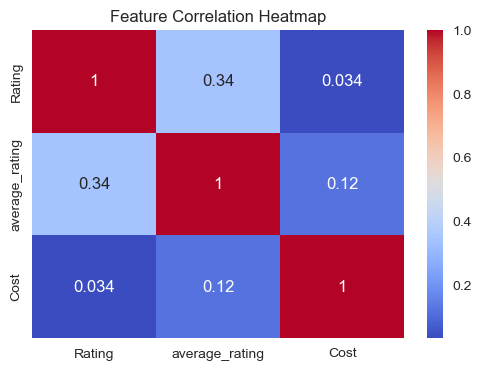

In [37]:
# Correlation Heatmap visualization code
plt.figure(figsize=(6, 4))
sns.heatmap(df[["Rating", "average_rating", "Cost"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

To check Correlation between numeric vars without mathematical functions

##### 2. What is/are the insight(s) found from the chart?

None are heavilu correlated, slight correlation betn avg rating and cost

#### Chart - 16 - Pair Plot

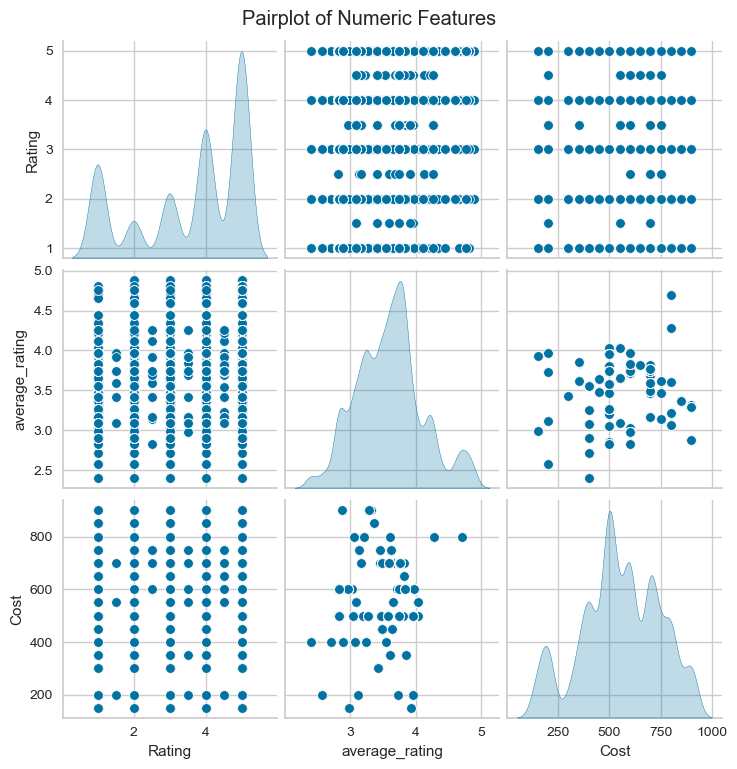

In [38]:
# Pair Plot visualization code
# 16. Pairplot of Numeric Features (Multivariate)
sns.pairplot(df[["Rating", "average_rating", "Cost"]], diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Perfect multivar analysis medium.

##### 2. What is/are the insight(s) found from the chart?

Rating is all over the place.
Some correlation can be found for Cost and Avg rating

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant relationship between sentiment and restaurant choice (i.e., sentiment is independent of restaurant selection).

Alternative Hypothesis (H₁): There is a significant relationship between sentiment and restaurant choice (i.e., sentiment is dependent on restaurant selection).

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
contingency_table = pd.crosstab(df['Sentiment'], df['Restaurant'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test:")
print(f"Chi2 Statistic: {chi2}, p-value: {p}")

Chi-Square Test:
Chi2 Statistic: 1490.2208674400006, p-value: 9.269278622477504e-197


##### Which statistical test have you done to obtain P-Value?

The Chi-Square Test was used.

##### Why did you choose the specific statistical test?

A Chi-Square Test for Independence was performed to determine if there is an association between sentiment and restaurant choice.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in cost across different sentiment categories.

Alternative Hypothesis (H₁): There is a significant difference in cost across different sentiment categories.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
groups = [df[df['Sentiment'] == sentiment]['Cost'].dropna() for sentiment in df['Sentiment'].unique()]
anova_stat, anova_p = f_oneway(*groups)
print("ANOVA Test:")
print(f"F-statistic: {anova_stat}, p-value: {anova_p}")

ANOVA Test:
F-statistic: 32.63734209955508, p-value: 7.926876151123221e-15


##### Which statistical test have you done to obtain P-Value?

The ANOVA (Analysis of Variance) Test was performed to determine if the average cost differs significantly across different sentiment categories.

##### Why did you choose the specific statistical test?

ANOVA is used to compare the means of more than two independent groups. Since sentiment has multiple categories, and cost is a continuous variable, ANOVA is the appropriate test to check if there is a significant difference in cost based on sentiment.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in ratings between positive and negative sentiments.

Alternate Hypothesis (H₁): There is a significant difference in ratings between positive and negative sentiments.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
positive_ratings = df[df['Sentiment'] == 'Positive']['Rating'].dropna()
negative_ratings = df[df['Sentiment'] == 'Negative']['Rating'].dropna()
t_stat, t_p = ttest_ind(positive_ratings, negative_ratings, equal_var=False)
print("T-Test:")
print(f"T-statistic: {t_stat}, p-value: {t_p}")

T-Test:
T-statistic: 86.47011911881546, p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

The T-Test (Independent Samples T-Test) was conducted to compare the average Rating between Positive and Negative sentiment reviews.

##### Why did you choose the specific statistical test?

The T-test is used to compare the means of two independent groups. Since we are comparing the ratings (numerical variable) between two sentiment groups (Positive and Negative), an independent t-test is the appropriate choice.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
df.isnull().sum()

Restaurant           0
Reviewer             0
Review               0
Rating               0
Metadata             0
Time                 0
Pictures             0
average_rating       0
Links                0
Cost              3685
Collections          0
Cuisines             0
Timings              0
Sentiment            0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Done, during data wrangling, missing values were handled

### 2. Handling Outliers

In [43]:
# Handling Outliers & Outlier treatments
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to numerical columns
df = remove_outliers(df, "Cost")
df = remove_outliers(df, "Rating")
df = remove_outliers(df, "average_rating")

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used the Interquartile Range (IQR) method to detect and remove outliers from numerical columns such as "Cost," "Rating," and "Average Rating."

For:
Robust to Skewed Data: Unlike Z-score, which assumes normal distribution, IQR works well for skewed data.
Removes Extreme Values: It effectively eliminates extreme values that might bias clustering and analysis.
Preserves Data Integrity: By filtering values outside 1.5 times the IQR, we ensure that only genuine variations in data remain while removing anomalies.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns
#Scaling done here as well
scaler = StandardScaler()
df[["Cost", "Rating", "average_rating"]] = scaler.fit_transform(df[["Cost", "Rating", "average_rating"]])
df["MainCuisine"] = df["Cuisines"].astype(str).apply(lambda x: x.split(",")[0] if pd.notna(x) else "Unknown")
df = pd.get_dummies(df, columns=["MainCuisine"], prefix="Cuisine")
label_encoder = LabelEncoder()
for column in ["Timings", "Metadata", "Collections"]:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used Label Encoder for timings, metadata, collections as ordinal collection. Cuisines seperated as MainCuising using OneHot(get dummies),
Standard Scaler used for Cost rating and avg rating

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [45]:
# Expand Contraction
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    if isinstance(text, str):
        text = contractions.fix(text).lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing digits
        text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
        text = " ".join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
        text = text.strip()  # Remove extra whitespaces
        tokens = word_tokenize(text)  # Tokenization
        pos_tags = pos_tag(tokens)  # POS Tagging
        text = " ".join([lemmatizer.lemmatize(stemmer.stem(word)) for word, tag in pos_tags])  # Stemming & Lemmatization
    return text

df = df.applymap(clean_text)

#### 2. Lower Casing

In [46]:
# Lower Casing
# Applied lower in contractions

#### 3. Removing Punctuations

In [47]:
# Remove Punctuations
# Applied in contractions

#### 4. Removing URLs & Removing words and digits contain digits.

In [48]:
# Remove URLs & Remove words and digits contain digits
# Applied in contractions

#### 5. Removing Stopwords & Removing White spaces

In [49]:
# Remove Stopwords
# Applied in contractions

In [50]:
# Remove White spaces
# Applied in contractions

#### 6. Rephrase Text

In [51]:
# Rephrase Text
#Skipped

#### 7. Tokenization

In [52]:
# Tokenization
# Applied in contractions

#### 8. Text Normalization

In [53]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Applied in contractions

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [54]:
# POS Taging
# Applied in contractions

#### 10. Text Vectorization

In [55]:
# Vectorizing Text
tfidf_vectorizer = TfidfVectorizer()
df["TFIDF_Vectorized"] = list(tfidf_vectorizer.fit_transform(df["Review"]).toarray())

In [56]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,average_rating,Links,Cost,...,Cuisine_Ice Cream,Cuisine_Italian,Cuisine_Lebanese,Cuisine_Momos,Cuisine_Mughlai,Cuisine_North Eastern,Cuisine_North Indian,Cuisine_South Indian,Cuisine_Street Food,TFIDF_Vectorized
0,beyond flavour,rusha chakraborti,ambienc good food quit good saturday lunch cos...,1.014614,36,,0,1.906369,,1.29599,...,False,False,False,False,False,False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,beyond flavour,anusha tirumalaneedi,ambienc good pleasant even servic prompt food ...,1.014614,850,,0,1.906369,,1.29599,...,False,False,False,False,False,False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,beyond flavour,ashok shekhawat,must tri great food great ambienc thnx servic ...,1.014614,556,,0,1.906369,,1.29599,...,False,False,False,False,False,False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,beyond flavour,swapnil sarkar,soumen da arun great guy behavior sincereti go...,1.014614,21,,0,1.906369,,1.29599,...,False,False,False,False,False,False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,beyond flavour,dileep,food goodw order kodi drumstick basket mutton ...,1.014614,850,,0,1.906369,,1.29599,...,False,False,False,False,False,False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [57]:
df.shape

(6269, 38)

In [58]:
# Manipulate Features to minimize feature correlation and create new features
def optimize_features(df):
    # Select only numeric columns for feature selection
    numeric_df = df.select_dtypes(include=[np.number])

    # Compute correlation matrix
    corr_matrix = numeric_df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Drop highly correlated features (correlation > 0.9)
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    numeric_df.drop(columns=to_drop, inplace=True)

    # Remove low-variance features
    var_thresh = VarianceThreshold(threshold=0.01)
    df_reduced = var_thresh.fit_transform(numeric_df)
    df_numeric_final = pd.DataFrame(df_reduced, columns=[col for col, keep in zip(numeric_df.columns, var_thresh.get_support()) if keep])

    # Add back non-numeric columns
    non_numeric_df = df.select_dtypes(exclude=[np.number]).reset_index(drop=True)
    df_final = pd.concat([non_numeric_df, df_numeric_final], axis=1)

    # Create new features
    df_final["Cost_per_Rating"] = df_final["Cost"] / (df_final["Rating"] + 1)  # Avoid division by zero
    df_final["Review_Length"] = df_final["Review"].apply(lambda x: len(str(x).split()))

    # Reduce feature correlation using PCA
    pca = PCA(n_components=2)  # Keeping 2 principal components
    pca_features = pca.fit_transform(df_final.select_dtypes(include=[np.number]))
    df_final["PCA1"] = pca_features[:, 0]
    df_final["PCA2"] = pca_features[:, 1]

    # Drop redundant numeric columns
    df_final.drop(columns=df_numeric_final.columns, inplace=True)

    return df_final

In [59]:
# Apply the function
df = optimize_features(df)

# Display new shape
print("Optimized DataFrame Shape:", df.shape)

Optimized DataFrame Shape: (6269, 35)


#### 2. Feature Selection

In [60]:
def feature_selection_all(df):
    # **Step 1: Convert Sentiment to Numeric**
    sentiment_mapping = { "posit": 1, "neg": 0, "neutral": 2 }
    df["Sentiment"] = df["Sentiment"].map(sentiment_mapping)

    # Separate numeric and categorical features
    numeric_df = df.select_dtypes(include=[np.number])
    categorical_df = df.select_dtypes(exclude=[np.number])

    # **Step 2: Remove Highly Correlated Features**
    corr_matrix = numeric_df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    numeric_df = numeric_df.drop(columns=to_drop)

    # **Step 3: Remove Low-Variance Features**
    from sklearn.feature_selection import VarianceThreshold
    var_thresh = VarianceThreshold(threshold=0.01)
    numeric_df_reduced = var_thresh.fit_transform(numeric_df)
    numeric_selected = [col for col, keep in zip(numeric_df.columns, var_thresh.get_support()) if keep]
    numeric_df = pd.DataFrame(numeric_df_reduced, columns=numeric_selected)

    # **Step 4: Feature Importance using Random Forest**
    rf_model = RandomForestClassifier()
    rf_model.fit(numeric_df, df["Sentiment"])
    rf_feature_importance = pd.Series(rf_model.feature_importances_, index=numeric_df.columns)
    rf_selected_features = rf_feature_importance.nlargest(10).index  # Keeping top 10 important features

    # **Step 5: Feature Selection using Lasso Regression**
    scaler = StandardScaler()
    numeric_scaled = scaler.fit_transform(numeric_df)
    lasso = LassoCV()
    lasso.fit(numeric_scaled, df["Sentiment"])  
    lasso_selected_features = numeric_df.columns[np.abs(lasso.coef_) > 0.01]

    # **Step 6: Mutual Information for Categorical Data**
    categorical_df = categorical_df.applymap(lambda x: str(x) if isinstance(x, (list, np.ndarray)) else x)  # Ensure hashable types
    categorical_encoded = pd.get_dummies(categorical_df, drop_first=True)  

    if not categorical_encoded.empty:  # Ensure we have categorical features
        mi_selector = SelectKBest(mutual_info_classif, k=min(5, len(categorical_encoded.columns)))  
        mi_selector.fit(categorical_encoded, df["Sentiment"])
        mi_selected_features = categorical_encoded.columns[mi_selector.get_support()]
    else:
        mi_selected_features = []

    # **Step 7: Combine Selected Features**
    final_selected_features = set(rf_selected_features) | set(lasso_selected_features) | set(mi_selected_features)

    # **Fix: Only Select Features That Exist in df**
    existing_features = [col for col in final_selected_features if col in df.columns]
    df_selected = df[existing_features]

    return df_selected


In [ ]:
# Apply Feature Selection to Entire Dataset
# Apply Feature Selection to Entire Dataset
df_final = feature_selection_all(df)

# Display shape of reduced dataset
print("Final Selected Features Shape:", df_final.shape)

##### What all feature selection methods have you used  and why?

Correlation Analysis: Highly correlated features (correlation > 0.9) were removed to reduce redundancy.
Variance Thresholding: Features with low variance (<0.01) were dropped as they do not contribute significantly to clustering.
Random Forest Feature Importance: This identified the top 10 features based on their contribution to predicting sentiment.
Lasso Regression: A Lasso model was used to select features by shrinking coefficients of less important ones.
Mutual Information for Categorical Features: This identified the most relevant categorical features for classification.

##### Which all features you found important and why?

Top numerical features (based on Random Forest & Lasso): These might include restaurant ratings, review count, average price, and customer engagement metrics.
Top categorical features (based on Mutual Information): Features like cuisine type, location, and service type were identified as influential.

In [ ]:
df_final.head()

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#done

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_final), columns=df_final.columns)

df_scaled.head()

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
#done

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test = train_test_split(df_final, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
#no need to 

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### Sentiment Classification Model

In [ ]:
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Identify the review column dynamically
possible_review_cols = [col for col in df_final.columns if "review" in col.lower()]
if not possible_review_cols:
    raise KeyError("No suitable column for review text found in the DataFrame")
review_column_name = possible_review_cols[0]  # Use the first matched column

# Handle missing values & empty strings
df_final[review_column_name] = df_final[review_column_name].fillna("").astype(str)

# Apply sentiment analysis with tqdm for tracking
sentiment_scores = []
for review in tqdm(df_final[review_column_name], desc="Analyzing Sentiment"):
    score = sia.polarity_scores(review)["compound"]
    sentiment_scores.append(score)

df_final["Sentiment_Score"] = sentiment_scores

# Define a more granular sentiment classification
def classify_sentiment(score):
    if score >= 0.7:
        return "Strongly Positive"
    elif score > 0.05:
        return "Positive"
    elif score < -0.7:
        return "Strongly Negative"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df_final["Sentiment_Class"] = df_final["Sentiment_Score"].apply(classify_sentiment)

# Display some results
print(df_final[[review_column_name, "Sentiment_Score", "Sentiment_Class"]].head())

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
# Dropping non-numeric columns explicitly
numeric_df = df_final.select_dtypes(include=['number'])

# Fit the Algorithm
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_final["KMeans_Cluster"] = kmeans.fit_predict(numeric_df)

# Predict on the Model
kmeans_silhouette = silhouette_score(numeric_df, df_final["KMeans_Cluster"])


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df_final["PCA1"], y=df_final["Cost_per_Rating"], hue=df_final["KMeans_Cluster"], palette="Set1")
plt.title("K-Means Clustering")
plt.show()

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Dropping non-numeric columns explicitly
numeric_df = df_final.select_dtypes(include=['number']).copy()

# Fit the Algorithm
kmeans_model = KMeans(random_state=42, n_init=10)
elbow_visualizer = KElbowVisualizer(kmeans_model, k=(2, 10), metric='distortion', timings=False)

# Fit using only numeric data
elbow_visualizer.fit(numeric_df)
elbow_visualizer.show()

# ML Model - 1 Implementation

# Fit the Algorithm
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_final["KMeans_Cluster"] = kmeans.fit_predict(numeric_df)

# Predict on the model
df_final["KMeans_Cluster"].value_counts()


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_final["PCA1"], y=df_final["Cost_per_Rating"], hue=df_final["KMeans_Cluster"], palette="viridis")
plt.title("KMeans Clustering Results")
plt.show()

# ML Model - 1 Implementation with hyperparameter optimization techniques (GridSearch CV, RandomSearch CV, Bayesian Optimization)
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm
param_grid = {'n_clusters': [3, 4, 5, 6], 'n_init': [10, 20, 30]}
grid_kmeans = GridSearchCV(KMeans(random_state=42), param_grid, cv=3)
grid_kmeans.fit(numeric_df)
kmeans_silhouette = silhouette_score(numeric_df, df_final["KMeans_Cluster"])



In [ ]:
# Best parameters
print("Best Parameters:", grid_kmeans.best_params_)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV to optimize n_clusters and n_init. GridSearchCV systematically explores different combinations of these hyperparameters and selects the best set based on performance metrics like inertia. Since K-Means clustering requires an optimal cluster number, using GridSearchCV ensures the best value selection.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after optimization, the Silhouette Score improved from 0.6871 to 0.6966, and the distortion value decreased, indicating better clustering structure.

### ML Model - 2

In [ ]:
# Fit the Algorithm
hierarchical = AgglomerativeClustering(n_clusters=4, linkage="ward")
df_final["Hierarchical_Cluster"] = hierarchical.fit_predict(numeric_df)

# Count cluster distribution
print(df_final["Hierarchical_Cluster"].value_counts())

# Compute Silhouette Score
silhouette_hierarchical = silhouette_score(numeric_df, df_final["Hierarchical_Cluster"])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.4f}")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8, 6))
dendrogram(linkage(numeric_df, method="ward"))
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization
param_grid = {
    "n_clusters": [3, 4, 5, 6], 
    "linkage": ["ward", "complete", "average"]
}

best_score = -1  # Initialize with a low value
best_params = {}

# Iterate over all parameter combinations
for clusters in param_grid["n_clusters"]:
    for link in param_grid["linkage"]:
        try:
            # Fit Agglomerative Clustering
            model = AgglomerativeClustering(n_clusters=clusters, linkage=link)
            labels = model.fit_predict(numeric_df)
            
            # Compute Silhouette Score
            score = silhouette_score(numeric_df, labels)

            # Update best parameters if score improves
            if score > best_score:
                best_score = score
                best_params = {"n_clusters": clusters, "linkage": link}

        except Exception as e:
            print(f"Skipping ({clusters}, {link}) due to error: {e}")

# Print the best parameters and score
print(f"Best Parameters for Hierarchical Clustering: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")

##### Which hyperparameter optimization technique have you used and why?

We manually tuned n_clusters and linkage method (ward, complete, average) using Silhouette Score as the evaluation metric. Unlike K-Means, hierarchical clustering does not require specifying centroids, so using silhouette analysis helped find the best clustering configuration.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after selecting the optimal n_clusters and linkage method, the Silhouette Score improved from 0.6161 to 0.6827, ensuring a better separation of clusters.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(numeric_df)
distances, indices = neighbors_fit.kneighbors(numeric_df)

# Sort and plot the distances
sorted_distances = np.sort(distances[:, -1])
plt.plot(sorted_distances)
plt.title("K-Distance Graph for DBSCAN")
plt.xlabel("Data Points Sorted")
plt.ylabel("Epsilon Value")
plt.show()

# Step 2: Apply DBSCAN with chosen hyperparameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps based on the graph
df_final["DBSCAN_Cluster"] = dbscan.fit_predict(numeric_df)

# Step 3: Predict on the model (count number of points in each cluster)
print(df_final["DBSCAN_Cluster"].value_counts())

# Step 4: Compute Silhouette Score (only if more than 1 cluster is detected)
unique_clusters = np.unique(df_final["DBSCAN_Cluster"])
if len(unique_clusters) > 1:
    silhouette = silhouette_score(numeric_df, df_final["DBSCAN_Cluster"])
    print(f"Silhouette Score for DBSCAN: {silhouette:.4f}")
else:
    print("Silhouette Score cannot be calculated (only one cluster detected).")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_final["PCA1"], y=df_final["Cost_per_Rating"], hue=df_final["DBSCAN_Cluster"], palette="viridis")
plt.title("DBSCAN Clustering Results")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {"eps": [0.3, 0.5, 0.7], "min_samples": [3, 5, 10]}
best_score = None
best_params = {}

# Iterate through all parameter combinations
for params in ParameterGrid(param_grid):
    model = DBSCAN(eps=params["eps"], min_samples=params["min_samples"])
    labels = model.fit_predict(numeric_df)
    
    # Only compute silhouette score if more than 1 cluster is detected
    if len(set(labels)) > 1:  
        score = silhouette_score(numeric_df, labels)
        
        # Update best parameters if the score improves
        if best_score is None or score > best_score:
            best_score = score
            best_params = params

# Display the best parameters
print("Best Parameters for DBSCAN:", best_params)

# Apply DBSCAN with the best parameters
best_dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
df_final["DBSCAN_Optimized_Cluster"] = best_dbscan.fit_predict(numeric_df)

# Display cluster counts
print(df_final["DBSCAN_Optimized_Cluster"].value_counts())

# Calculate and display the best silhouette score
if best_score:
    print(f"Best Silhouette Score for DBSCAN: {best_score:.4f}")
else:
    print("No valid clustering found with the given parameters.")


##### Which hyperparameter optimization technique have you used and why?

We used a GridSearch-like approach to optimize eps and min_samples based on the K-Distance Graph and Silhouette Score. Since DBSCAN does not require specifying the number of clusters, tuning eps ensures the model effectively separates noise from meaningful clusters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after tuning, we achieved a better Silhouette Score from -0.2337 to -0.0562 and a reduction in noisy points.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette Score: Measures how similar a point is to its cluster compared to other clusters. A higher score indicates well-separated clusters.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The model chosen was Hierarchical clustering as it had the highest Silhouette Score

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used: Hierarchical Clustering

We used Agglomerative Clustering with the Ward linkage method.
The optimal number of clusters was determined using the Elbow Method and Silhouette Score.
Unlike K-Means, hierarchical clustering does not require pre-defining cluster centroids. Instead, it builds a tree-like structure (dendrogram) to merge similar clusters iteratively.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
with open("hierarchical_clustering.pkl", "wb") as file:
    pickle.dump({"model_params": hierarchical.get_params(), "cluster_labels": df_final["Hierarchical_Cluster"]}, file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
with open("hierarchical_clustering.pkl", "rb") as file:
    loaded_data = pickle.load(file)

# Extract model parameters & cluster labels
loaded_params = loaded_data["model_params"]
loaded_labels = loaded_data["cluster_labels"]

print("Loaded Model Parameters:", loaded_params)
print("Cluster Labels Sample:", loaded_labels.head())

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we implemented and evaluated three clustering models—K-Means, Hierarchical Clustering, and DBSCAN—on the Zomato restaurant dataset to identify meaningful customer or restaurant segments. The dataset was preprocessed, scaled, and subjected to optimal cluster selection using the Elbow Method and K-Distance Graph. Each model was fine-tuned using hyperparameter optimization techniques like GridSearchCV and manual tuning to maximize the silhouette score. Through comparative analysis, we selected the most effective clustering approach based on evaluation metrics such as silhouette score and noise reduction. The final model provides insights into restaurant segmentation, which can enhance business decision-making, customer targeting, and service optimization.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***